In [4]:
import pandas as pd#necessary imports
import numpy as np

In [5]:
# file = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Documents\\Data _Analytics_Project\\train_V2.csv")
file = pd.read_csv("C:/Users/vaish/OneDrive/Documents/Data _Analytics_Project/train_V2.csv.csv")#read data

In [6]:
print(file.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB
None


In [9]:
file.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
na_file = file[file.isnull().any(axis =1)]

In [11]:
na_file

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
na_file

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [14]:
file[file['matchId'] == '224a123c53e008']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Hence there are null values and and also the match only involved one player, so the data in this row is irrelevant. Hence, we remove it.

In [15]:
file = file[file['matchId'] != '224a123c53e008']

In [16]:
file


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.440,1395,squad-fpp,28,28,1418,0,0.0000,0,0.000,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.000,1316,squad-fpp,28,28,-1,0,0.0000,0,0.000,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.000,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.000,1375,squad,28,27,1493,0,0.0000,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.000,1930,squad,29,27,1349,0,0.0000,0,0.000,0,0,65.67,1,0,0.2143


We will be doing feature engineering with 2 approaches - first considering the raw data and then normalizing the data. 


We first have a look at the correlation between various aspects of the data. For this we do not need the following columns - match id, group id, id and match type(categorical data). Hence we drop those columns for this part.

In [168]:
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType']
cols_for_corr = [col for col in file.columns if col not in cols_to_drop]
corr = file[cols_for_corr].corr()

In [169]:
import matplotlib.pyplot as plt#necessary imports
import seaborn as sns


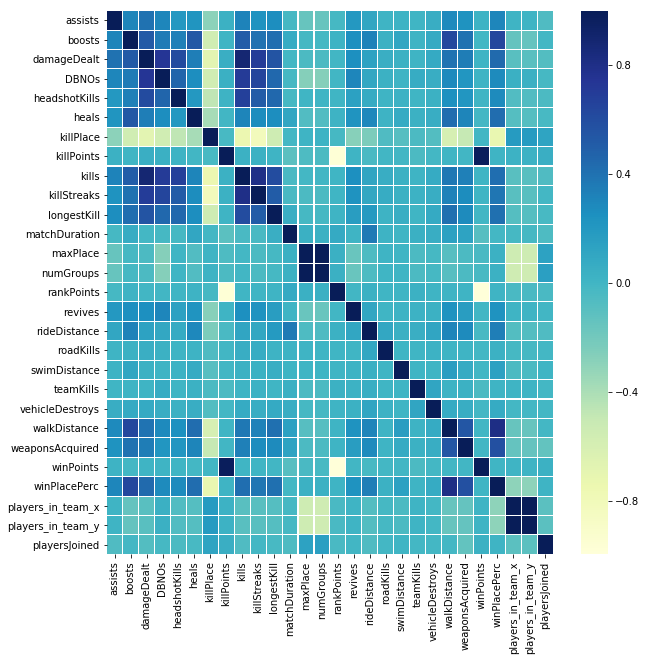

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()

The heatmap gives us an idea of the relation btween winPlacePerc and other features but not clarity enough. Hence we explore some features of the data we think should be relevant and test our hypothesis.

We create a new column to see how many players each group has.

In [30]:
group_players_df = file.groupby(['groupId']).size().to_frame('players_in_team')#players in each team

In [31]:
file = file.merge(group_players_df, how='left', on=['groupId'])

# We explore the data to get an idea of the features to create.

Let's have a look at some of the features of the kills column. 

# Kills

People killed

In [41]:
print("The average person kills " + str(file['kills'].mean()) + " people")
print("25% of the people have killed " + str(file['kills'].quantile(0.25)) +" people or less")
print("50% of the people have killed " + str(file['kills'].quantile(0.50)) +" people or less")
print("75% of the people have killed " + str(file['kills'].quantile(0.75)) +" people or less")
#print("85% of the people have killed " + str(file['kills'].quantile(0.85)) +" people or less")
#print("95% of the people have killed " + str(file['kills'].quantile(0.95)) +" people or less")
print("99% of the people have killed " + str(file['kills'].quantile(0.99)) +" people or less")

The average person kills 0.9247835321393355 people
25% of the people have killed 0.0 people or less
50% of the people have killed 0.0 people or less
75% of the people have killed 1.0 people or less
99% of the people have killed 7.0 people or less


In [43]:
print("Maximum recorded kills are "+ str(file['kills'].max()))

Maximum recorded kills are 72


In [93]:
file[file['kills'] == file['kills'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,players_in_team_y
3431246,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,0,72,7,78.23,1800,normal-squad,15,15,1500,0,0.0,0,0.0,0,0,728.1,35,0,1.0,3,3


So player 06308c988bf0c2	killed maximum number of players = 72 with 64 headshotkills and 7 kill streaks. Impressive!

In [82]:
corr_kills = file[['kills', 'winPlacePerc']].corr()
corr_kills

,kills,winPlacePerc
kills,1.000000,0.419916
winPlacePerc,0.419916,1.000000


Kills and WinPlacePerc have a decent correlation and hence having a look at the player who killed maximum number of players might be helpful in the future.

# Killstreaks

People killed in a short time

In [50]:
print("The average person kills " +str(file['killStreaks'].mean()) + " in a short time")
print("25% of people have killed "+str(file['killStreaks'].quantile(0.25)) + " in a short time")
print("50% of people have killed "+str(file['killStreaks'].quantile(0.5)) + " in a short time")
print("75% of people have killed "+str(file['killStreaks'].quantile(0.75)) + " in a short time")
print("99% of people have killed "+str(file['killStreaks'].quantile(0.99)) + " in a short time")

The average person kills 0.5439552593735277 in a short time
25% of people have killed 0.0 in a short time
50% of people have killed 0.0 in a short time
75% of people have killed 1.0 in a short time
99% of people have killed 3.0 in a short time


In [51]:
print("Maximum recorded kills are "+ str(file['killStreaks'].max()))

Maximum recorded kills are 20


In [95]:
corr_killStreaks = file[['killStreaks', 'winPlacePerc']].corr()
corr_killStreaks

,killStreaks,winPlacePerc
killStreaks,1.000000,0.377566
winPlacePerc,0.377566,1.000000


Again there is a decent correlation between killstreaks and winPlacePerc

In [96]:
file[file['killStreaks'] == file['killStreaks'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,players_in_team_y
3924728,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,1000,40,20,621.8,799,normal-squad-fpp,10,10,-1,0,0.0,0,0.0,0,0,1180.0,2,1500,1.0,9,9


# Roadkills

People killed from a vehicle

In [56]:
print("The average person kills " + str(file['roadKills'].mean()) + " people")  
print("25% of the people have killed " + str(file['roadKills'].quantile(0.25)) +" people or less in a vehicle")
print("50% of the people have killed " + str(file['roadKills'].quantile(0.50)) +" people or less in a vehicle")
print("75% of the people have killed " + str(file['roadKills'].quantile(0.75)) +" people or less in a vehicle")
print("99% of the people have killed " + str(file['roadKills'].quantile(0.99)) +" people or less in a vehicle")

The average person kills 0.003496092278666461 people
25% of the people have killed 0.0 people or less in a vehicle
50% of the people have killed 0.0 people or less in a vehicle
75% of the people have killed 0.0 people or less in a vehicle
99% of the people have killed 0.0 people or less in a vehicle


So we can observe that it is difficult to kill people from a vehicle

In [57]:
print("Maximum recorded kills in a vehcile are "+ str(file['roadKills'].max()))

Maximum recorded kills in a vehcile are 18


In [81]:
corr_roadKills = file[['roadKills', 'winPlacePerc']].corr()
corr_roadKills

,roadKills,winPlacePerc
roadKills,1.000000,0.034544
winPlacePerc,0.034544,1.000000


Hence there is very little correlation between roadkills and winPlacePerc

# Number of times a player killed his own team member

In [59]:
print("The average person kills " + str(file['teamKills'].mean()) + " people")  
print("25% of the people have killed " + str(file['teamKills'].quantile(0.25)) +" from their team")
print("50% of the people have killed " + str(file['teamKills'].quantile(0.50)) +" from their team")
print("75% of the people have killed " + str(file['teamKills'].quantile(0.75)) +" from their team")
print("99% of the people have killed " + str(file['teamKills'].quantile(0.99)) +" from their team")

The average person kills 0.0238684136259224 people
25% of the people have killed 0.0 from their team
50% of the people have killed 0.0 from their team
75% of the people have killed 0.0 from their team
99% of the people have killed 1.0 from their team


In [75]:
print("Maximum recorded kills in a vehcile are "+ str(file['teamKills'].max()))

Maximum recorded kills in a vehcile are 12


In [85]:
corr_teamKills = file[['teamKills', 'winPlacePerc']].corr()
corr_teamKills

,teamKills,winPlacePerc
teamKills,1.000000,0.015943
winPlacePerc,0.015943,1.000000


Hence there is very little correlation between killing teammates and winPlacePerc.

# Headshot Kills

In [91]:
print("The average person kills " + str(file['headshotKills'].mean()) + " enemies with a headshot")
print("25% of the people kills " + str(file['headshotKills'].quantile(0.25)) + " enemies with a headshot")
print("50% of the people kills " + str(file['headshotKills'].quantile(0.5)) + " enemies with a headshot")
print("75% of the people kills " + str(file['headshotKills'].quantile(0.75)) + " enemies with a headshot")
print("99% of the people kills " + str(file['headshotKills'].quantile(0.99)) + " enemies with a headshot")

The average person kills 0.22681963991171508 enemies with a headshot
25% of the people kills 0.0 enemies with a headshot
50% of the people kills 0.0 enemies with a headshot
75% of the people kills 0.0 enemies with a headshot
99% of the people kills 3.0 enemies with a headshot


In [92]:
"Maximum recorded headshot kills are " + str(file['headshotKills'].max()) 

'Maximum recorded headshot kills are 64'

In [97]:
corr_headshotKills = file[['headshotKills', 'winPlacePerc']].corr()
corr_headshotKills

,headshotKills,winPlacePerc
headshotKills,1.000000,0.277722
winPlacePerc,0.277722,1.000000


Again there is a decent correlation between headshot kills and WinPlacePerc. Let's look at the player with max headshot kills.

In [98]:
file[file['headshotKills'] == file['headshotKills'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,players_in_team_y
3431246,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,0,72,7,78.23,1800,normal-squad,15,15,1500,0,0.0,0,0.0,0,0,728.1,35,0,1.0,3,3


So the player with the maximum kills had maximum headshotkills as well! Interesting!

# Damage to enemy players

In [102]:
null_kills = file[file['kills'] == 0]#players with 0 kills

In [103]:
len(null_kills)

2529721

So there are a significant amount of people with 0 kills, as we had observed before. We can check however if they inflict significant damage on the enemy.

In [105]:
corr_damageDealt = file[['damageDealt', 'winPlacePerc']].corr()
corr_damageDealt

,damageDealt,winPlacePerc
damageDealt,1.000000,0.440507
winPlacePerc,0.440507,1.000000


Hence we see there is a high correlation between damage dealth and winPlacePerc

In [107]:
# corr_null_kills = null_kills[['damageDealt', 'winPlacePerc']].corr()
# corr_null_kills

# Running

Distance travelled by foot.

In [111]:
print("The average person runs " + str(file['walkDistance'].mean()) +" units")
print("25% of the people run " + str(file['walkDistance'].quantile(0.25)) +" units")
print("50% of the people run " + str(file['walkDistance'].quantile(0.5)) +" units")
print("75% of the people run " + str(file['walkDistance'].quantile(0.75)) + " units")
print("99% of the people run " + str(file['walkDistance'].quantile(0.99)) + " units")

The average person runs 1154.218118648076 units
25% of the people run 155.1 units
50% of the people run 685.6 units
75% of the people run 1976.0 units
99% of the people run 4396.0 units


In [114]:
print("Max distance travelled by foot is " + str(file['walkDistance'].max()) +" units")

Max distance travelled by foot is 25780.0 units


In [115]:
corr_walkDistance = file[['walkDistance', 'winPlacePerc']].corr()

In [116]:
corr_walkDistance

,walkDistance,winPlacePerc
walkDistance,1.000000,0.810888
winPlacePerc,0.810888,1.000000


Woah! That's a very strong correlation there. We'll keep this in mind.

In [137]:
file[file['walkDistance'] == file['walkDistance'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,players_in_team_y
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,0,0,0,0.0,1889,solo-fpp,95,93,1520,0,0.0078,0,381.9,0,0,25780.0,0,0,0.9894,1,1


# Swimming

In [125]:
print("The average person swims atleast " + str(file['swimDistance'].mean()) +" units")
print("25% of the people swims atleast " + str(file['swimDistance'].quantile(0.25)) +" units")
print("50% of the people swims atleast " + str(file['swimDistance'].quantile(0.5)) +" units")
print("75% of the people swims atleast " + str(file['swimDistance'].quantile(0.75)) + " units")
print("99% of the people swims atleast " + str(file['swimDistance'].quantile(0.99)) + " units")

The average person swims atleast 4.509323465329768 units
25% of the people swims atleast 0.0 units
50% of the people swims atleast 0.0 units
75% of the people swims atleast 0.0 units
99% of the people swims atleast 123.0 units


In [126]:
print("Max distance travelled by swimming is " + str(file['swimDistance'].max()) +" units")

Max distance travelled by swimming is 3823.0 units


In [127]:
corr_swimDistance = file[['swimDistance', 'winPlacePerc']].corr()
corr_swimDistance

,swimDistance,winPlacePerc
swimDistance,1.000000,0.149607
winPlacePerc,0.149607,1.000000


We observe that 75% of the population doesn't swim at all. Hence it is probably not that surprising that the correlation above is low.

# Driving

In [132]:
print("The average person drives " + str(file['rideDistance'].mean()) +" units")
print("25% of the people drives " + str(file['rideDistance'].quantile(0.25)) +" units or less")
print("50% of the people drives " + str(file['rideDistance'].quantile(0.5)) +" units or less")
print("75% of the people drives " + str(file['rideDistance'].quantile(0.75)) + " units or less")
print("99% of the people drives " + str(file['rideDistance'].quantile(0.99)) + " units or less")

The average person drives 606.1158054527955 units
25% of the people drives 0.0 units or less
50% of the people drives 0.0 units or less
75% of the people drives 0.191 units or less
99% of the people drives 6966.0 units or less


In [134]:
print("Max distance travelled by vehicle is " + str(file['rideDistance'].max()) +" units")

Max distance travelled by vehicle is 40710.0 units


In [135]:
corr_rideDistance = file[['rideDistance', 'winPlacePerc']].corr()
corr_rideDistance

,rideDistance,winPlacePerc
rideDistance,1.000000,0.342915
winPlacePerc,0.342915,1.000000


Correlation here is better than swimming but still not as good as walking. This is probably because 50% of the people don't drive. 

# Total Distance Travelled

We now create a new feature : Total Distance Travelled = running distance + vehicle distance + swimming distance and examine the correlation.

In [140]:
data = file[['winPlacePerc']].copy()
data['totalDistance'] = file['walkDistance'] + file['rideDistance'] + file['swimDistance']

In [142]:
print("The average person travels " + str(data['totalDistance'].mean()) +" units")
print("25% of the people travel " + str(data['totalDistance'].quantile(0.25)) +" units or less")
print("50% of the people travel " + str(data['totalDistance'].quantile(0.5)) +" units or less")
print("75% of the people travel " + str(data['totalDistance'].quantile(0.75)) + " units or less")
print("99% of the people travel " + str(data['totalDistance'].quantile(0.99)) + " units or less")

The average person travels 1764.8432475661932 units
25% of the people travel 158.1 units or less
50% of the people travel 788.2 units or less
75% of the people travel 2728.4591 units or less
99% of the people travel 9309.0 units or less


In [145]:
print("Maximum distance travelled by a person in a single game is " + str(data['totalDistance'].max()))

Maximum distance travelled by a person in a single game is 41270.1


# Effect of Healing and Boosts

In [149]:
print("The average person uses " + str(file['boosts'].mean()) + " boosts")
print("25% of the people use " + str(file['boosts'].quantile(0.25)) + " boosts")
print("50% of the people use " + str(file['boosts'].quantile(0.5)) + " boosts")
print("75% of the people use " + str(file['boosts'].quantile(0.75)) + " boosts")
print("99% of the people use " + str(file['boosts'].quantile(0.99)) + " boosts")

The average person uses 1.1069079698176172 boosts
25% of the people use 0.0 boosts
50% of the people use 0.0 boosts
75% of the people use 2.0 boosts
99% of the people use 7.0 boosts


In [152]:
print("Maximum boosts used are " + str(file['boosts'].max()) + " boosts")

Maximum boosts used are 33 boosts


In [153]:
print("The average person uses " + str(file['heals'].mean()) + " heals")
print("25% of the people use " + str(file['heals'].quantile(0.25)) + " heals")
print("50% of the people use " + str(file['heals'].quantile(0.5)) + " heals")
print("75% of the people use " + str(file['heals'].quantile(0.75)) + " heals")
print("99% of the people use " + str(file['heals'].quantile(0.99)) + " heals")

The average person uses 1.3701475050961722 heals
25% of the people use 0.0 heals
50% of the people use 0.0 heals
75% of the people use 2.0 heals
99% of the people use 12.0 heals


In [154]:
print("Maximum heals used are " + str(file['heals'].max()) + " heals")

Maximum heals used are 80 heals


In [155]:
file[file['heals'] == file['heals'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,players_in_team_y
4262661,3be1ded892f443,5c6c4e66418c25,ce09de37cf3f5a,0,1,230.0,5,0,80,41,1440,0,0,0.0,1866,squad,26,25,-1,4,3367.0,0,0.0,0,0,932.7,4,1527,0.76,4,4


In [156]:
boosts_corr = file[['boosts', 'winPlacePerc']].corr()
heals_corr = file[['heals', 'winPlacePerc']].corr()

In [157]:
boosts_corr#high correlation

,boosts,winPlacePerc
boosts,1.000000,0.634234
winPlacePerc,0.634234,1.000000


In [159]:
heals_corr#worth giving a thought

,heals,winPlacePerc
heals,1.000000,0.427857
winPlacePerc,0.427857,1.000000


# Match Duration

In [161]:
print("The average person lasts " + str(file['matchDuration'].mean()) + " seconds")
print("25% of the people last " + str(file['matchDuration'].quantile(0.25)) + " seconds")
print("50% of the people last " + str(file['matchDuration'].quantile(0.5)) + " seconds")
print("75% of the people last " + str(file['matchDuration'].quantile(0.75)) + " seconds")
print("99% of the people last " + str(file['matchDuration'].quantile(0.99)) + " seconds")

The average person lasts 1579.5067928351134 seconds
25% of the people last 1367.0 seconds
50% of the people last 1438.0 seconds
75% of the people last 1851.0 seconds
99% of the people last 2052.0 seconds


In [162]:
print("Highest match duration : " + str(file['matchDuration'].max()) + " seconds")
print("Shortest match duration : " + str(file['matchDuration'].min()) + " seconds")

Highest match duration : 2237 seconds
Shortest match duration : 133 seconds


In [164]:
corr_matchDur = file[['matchDuration', 'winPlacePerc']].corr()
corr_matchDur

,matchDuration,winPlacePerc
matchDuration,1.000000,-0.005171
winPlacePerc,-0.005171,1.000000


Seems that match duration is not that useful

# Number of players in the game 

In [165]:
file['playersJoined'] = file.groupby('matchId')['matchId'].transform('count')

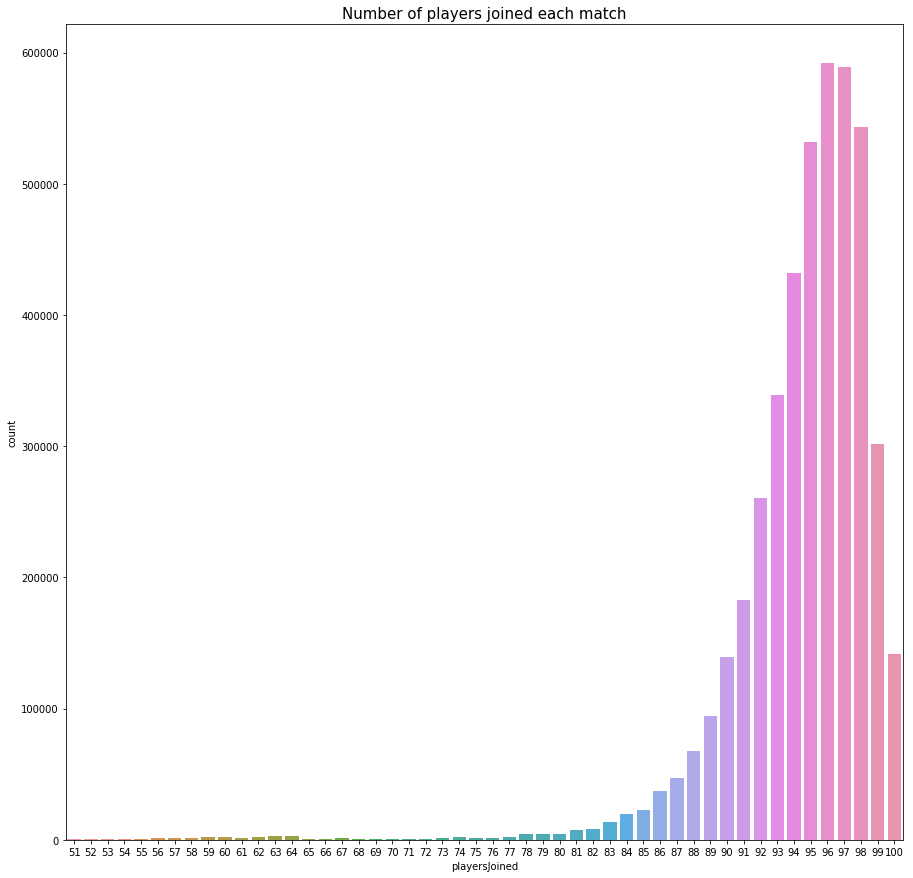

In [166]:
data = file[file['playersJoined'] > 50]

plt.figure(figsize=(15,15))
sns.countplot(data['playersJoined'].sort_values())
plt.title('Number of players joined each match',fontsize=15)
plt.show()

Not a lot of games exhaust the total capacity of 100 players. We must keep this in mind during feature engineering and normalize the data.